In [1]:
import pandas as pd

df = pd.read_csv('page-blocks.csv')

In [2]:
df = df.rename(columns={'Unnamed: 10': 'CLASSIFICATION'})

In [ ]:
df.isna().sum()

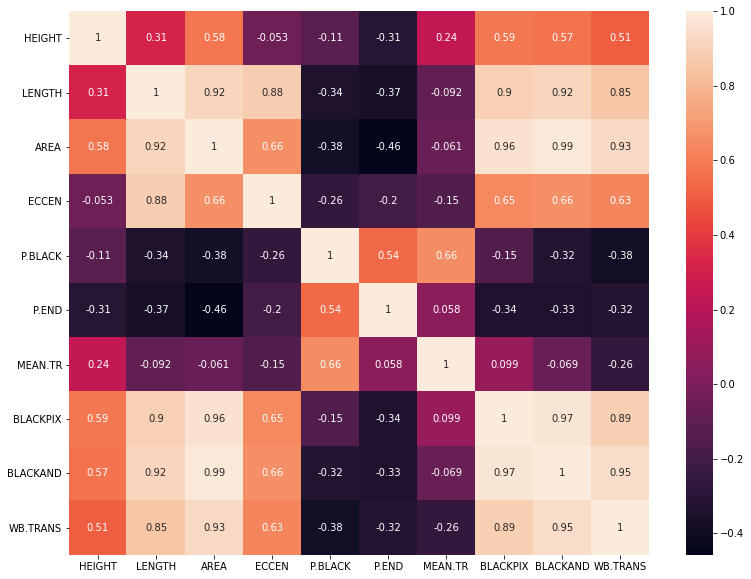

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(13, 10))
sns.heatmap(df.drop('CLASSIFICATION', axis=1).corr(method='spearman'), annot=True)
plt.show()

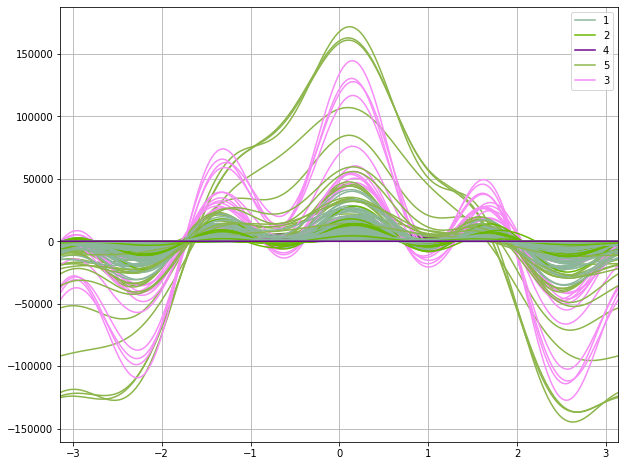

In [5]:
plt.figure(figsize=(10, 8))
pd.plotting.andrews_curves(df, 'CLASSIFICATION')
plt.show()

In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
columns = ['HEIGHT', 'LENGTH', 'AREA', 'ECCEN', 'P.BLACK', 'P.END', 'MEAN.TR',
            'BLACKPIX', 'BLACKAND', 'WB.TRANS']
df[columns] = scaler.fit_transform(df[columns])

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('CLASSIFICATION', axis=1)
y = df['CLASSIFICATION']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

In [ ]:
from sklearn.linear_model import RidgeClassifier

model = RidgeClassifier()
model = model.fit(X_train, y_train)

print("Model score:", model.score(X_test, y_test))

In [ ]:
model.get_params()

In [ ]:
from sklearn.model_selection import GridSearchCV
import numpy as np

model_cv = GridSearchCV(estimator=model, param_grid=dict(alpha=np.array(np.logspace(-6, -1, 10))), n_jobs=-1)
model_cv_final = model_cv.fit(X_train, y_train)

print("Model score:", model_cv_final.score(X_test, y_test))

In [ ]:
from sklearn.model_selection import cross_validate

scoring = ['precision_macro', 'recall_macro']
scores = cross_validate(model_cv_final, X, y, cv=6, scoring='balanced_accuracy')
sorted(scores.keys())
scores

In [ ]:
model_cv_final.best_score_

In [ ]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(model_cv_final)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

In [ ]:
from yellowbrick.classifier import ClassificationReport

cr = ClassificationReport(model_cv_final, support=True)
cr.fit(X_train, y_train)
cr.score(X_test, y_test)
cr.show()